In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from heat_plot_config import *

Iteration: 1, Target Distance: -2000.0000 km, Actual Distance: 2492.1677 km, Error: 492.1677 km
Iteration: 2, Target Distance: -2000.0000 km, Actual Distance: 1987.5814 km, Error: -12.4186 km
Iteration: 3, Target Distance: -2000.0000 km, Actual Distance: 2000.3384 km, Error: 0.3384 km
Iteration: 4, Target Distance: -2000.0000 km, Actual Distance: 1999.9908 km, Error: -0.0092 km
Iteration: 5, Target Distance: -2000.0000 km, Actual Distance: 2000.0003 km, Error: 0.0003 km
Iteration: 6, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: -0.0000 km
Iteration: 7, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: 0.0000 km
Rectangle Corners: [[-120.           39.5       ]
 [-102.5          22.5       ]
 [-116.59028114   10.55035943]
 [-134.09028114   29.23228783]]


In [3]:
from plot_config import *

In [4]:
from matplotlib import cm

In [5]:
from matplotlib.gridspec import GridSpec

In [6]:
import matplotlib.patches as patches

In [7]:
import matplotlib.dates as dates

In [8]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [9]:
# extra_text = 'The spread are enhanced 10 times'

In [10]:
rhoconst = 1029
c_p = 3994

In [11]:
rhs_list = [i for i in rhs_list if i !='F']

In [12]:
ecco_grid = xr.open_zarr('~/ECCO_transport')
xg = np.load('../james_plot/plotting_xg.npy')
yg = np.load('../james_plot/plotting_yg.npy')

In [13]:
number_of_p = {
    'nep_north_mhw':70236,
    'nep_south_mhw':29883,
}
TOTAL_VOLUME = 1104657408754759.1
VOLUME_EACH = TOTAL_VOLUME/100119

In [14]:
VOLUME_EACH/1e9

11.033444288843866

In [15]:
from geopy.distance import geodesic

def calculate_projected_rectangle(lon1, lat1, lon2, lat2, perpendicular_distance, projection=ccrs.PlateCarree()):
    """
    Compute the four corners of a rectangle in a projected coordinate system.

    Parameters:
    lon1, lat1 : float : Longitude and Latitude of first point
    lon2, lat2 : float : Longitude and Latitude of second (adjacent) point
    perpendicular_distance : float : Distance along the perpendicular edge in projected space (km)
    projection : cartopy.crs : The map projection to use (default: PlateCarree)

    Returns:
    list : Four corner points [(lonA, latA), (lonB, latB), (lonC, latC), (lonD, latD)]
    """

    # Convert lat/lon to projected coordinates (meters)
    x1, y1 = projection.transform_point(lon1, lat1, ccrs.Geodetic())
    x2, y2 = projection.transform_point(lon2, lat2, ccrs.Geodetic())

    lat_test = lat1 + 1 / 111  # ~1 km in latitude
    x_test, y_test = projection.transform_point(lon1, lat_test, ccrs.Geodetic())
    
    # Compute how many projected units correspond to 1 km in this location
    meters_per_unit = np.hypot(x_test - x1, y_test - y1)

    # Convert perpendicular distance from km to projected coordinates
    perpendicular_distance_proj = perpendicular_distance * meters_per_unit

    # Compute direction vector along the given edge
    dx, dy = x2 - x1, y2 - y1

    # Compute perpendicular vector (-dy, dx) normalized
    length = np.hypot(dx, dy)
    for _ in range(7):
        perp_dx = (-dy / length) * perpendicular_distance_proj
        perp_dy = (dx / length) * perpendicular_distance_proj
    
        # Compute the four corners
        x3, y3 = x2 + perp_dx, y2 + perp_dy
        x4, y4 = x1 + perp_dx, y1 + perp_dy
    
        # Convert back to latitude/longitude
        normal_proj = ccrs.PlateCarree()
        lon3, lat3 = normal_proj.transform_point(x3, y3, projection)
        lon4, lat4 = normal_proj.transform_point(x4, y4, projection)
        
        actual_distance_km = geodesic((lat2, lon2), (lat3, lon3)).km
        adjustment_factor = abs(perpendicular_distance) / actual_distance_km if actual_distance_km > 0 else 1
        perpendicular_distance_proj *= adjustment_factor
        error = abs(actual_distance_km) - abs(perpendicular_distance)

        # perpendicular_distance_proj -= error*meters_per_unit
        print(f"Iteration: {_+1}, Target Distance: {perpendicular_distance:.4f} km, "
              f"Actual Distance: {actual_distance_km:.4f} km, Error: {error:.4f} km")

    return np.array([(lon1, lat1), (lon2, lat2), (lon3, lat3), (lon4, lat4)])

# Example usage
lon1, lat1 = -120, 39.5  # Example point
lon2, lat2 = -102.5, 22.5  # Another point (slightly east)
perpendicular_distance = -2000  # 10 km perpendicular edge

rectangle_corners = calculate_projected_rectangle(lon1, lat1, lon2, lat2, perpendicular_distance,projection = projection)

print("Rectangle Corners:", rectangle_corners)
[(lon1, lat1), (lon2, lat2), (lon3, lat3), (lon4, lat4)] = rectangle_corners

Iteration: 1, Target Distance: -2000.0000 km, Actual Distance: 2492.1677 km, Error: 492.1677 km
Iteration: 2, Target Distance: -2000.0000 km, Actual Distance: 1987.5814 km, Error: -12.4186 km
Iteration: 3, Target Distance: -2000.0000 km, Actual Distance: 2000.3384 km, Error: 0.3384 km
Iteration: 4, Target Distance: -2000.0000 km, Actual Distance: 1999.9908 km, Error: -0.0092 km
Iteration: 5, Target Distance: -2000.0000 km, Actual Distance: 2000.0003 km, Error: 0.0003 km
Iteration: 6, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: -0.0000 km
Iteration: 7, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: 0.0000 km
Rectangle Corners: [[-120.           39.5       ]
 [-102.5          22.5       ]
 [-116.59028114   10.55035943]
 [-134.09028114   29.23228783]]


In [32]:
idate = 8827
len_time = 912
xtime = rtime[idate:idate-len_time:-1]
def plt_case_line(case,ax,ylim = (-0.75,1.5)):
    
    
    pre = 'precalc/'+case+'_'
    
    # if 'nep' in case:
    #     TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_nep,NUMBER_OF_PARTICLE_nep,VOLUME_EACH_nep,nep_idate
    # if 'wau' in case:
        # TOTAL_VOLUME,NUMBER_OF_PARTICLE,VOLUME_EACH,idate = TOTAL_VOLUME_wau,NUMBER_OF_PARTICLE_wau,VOLUME_EACH_nep,wau_idate
    NUMBER_OF_PARTICLE = number_of_p[case]
    mean = xr.open_zarr(pre+'mean.zarr')
    std = xr.open_zarr(pre+'std.zarr')
    mean['I'] = mean['F']+mean['I']
    std['I'] = np.sqrt(std['F']**2+std['I']**2)
    
    handles = []
    labels = []
    offset = float(mean['sl'][0])
    for var in rhs_list:
        a_mean = -mean[var][::-1]
        a_std = std[var][::-1]/np.sqrt(NUMBER_OF_PARTICLE-1)
        mean_line, = ax.plot(xtime, a_mean, label=case_term_dic[var], color=color_dic[var])
        spread_area = ax.fill_between(xtime, a_mean - a_std, a_mean + a_std, alpha=0.3, label=case_term_dic[var], color=color_dic[var])
        handles.append((mean_line, spread_area))
        labels.append(case_term_dic[var])
    mean['tot'] = (mean['A']+mean['e_ua']+mean['E']+mean['dif_h']+mean['dif_v']+mean['I'])
    salt = np.array(mean['sl'].data)
    to_explain = salt - offset
    error = to_explain + mean['tot']
    error_line, = ax.plot(xtime, error[::-1],':', color='k')
    handles.append(error_line)
    labels.append('Error')

    salt_line, = ax.plot(xtime, salt[::-1]-offset,color = 'r')
    a_std = np.array(std['sl'])/np.sqrt(NUMBER_OF_PARTICLE-1)
    spread_area = ax.fill_between(xtime, salt[::-1] - a_std[::-1]-offset, salt[::-1] + a_std[::-1]-offset, alpha=0.3, color = 'r')
    handles.append((salt_line,spread_area))
    labels.append('Temperature Anomaly')
    # invisible_line, = plt.plot([],[],c = 'none')
    legend = ax.legend(handles,labels,fontsize = 8,loc = 'upper left',framealpha=0.6)
    plt.setp(legend.get_title(),fontsize=7)

    ax2 = ax.twinx()
    ax2.set_ylim(ylim[0] + offset, ylim[1] + offset)
    ax.set_ylim(*ylim)

    ax.set_ylabel(r'Cumulative Change ($^\circ \mathrm{C}$)')
    ax2.set_ylabel(r'Temperature Anomaly ($^\circ \mathrm{C}$)')

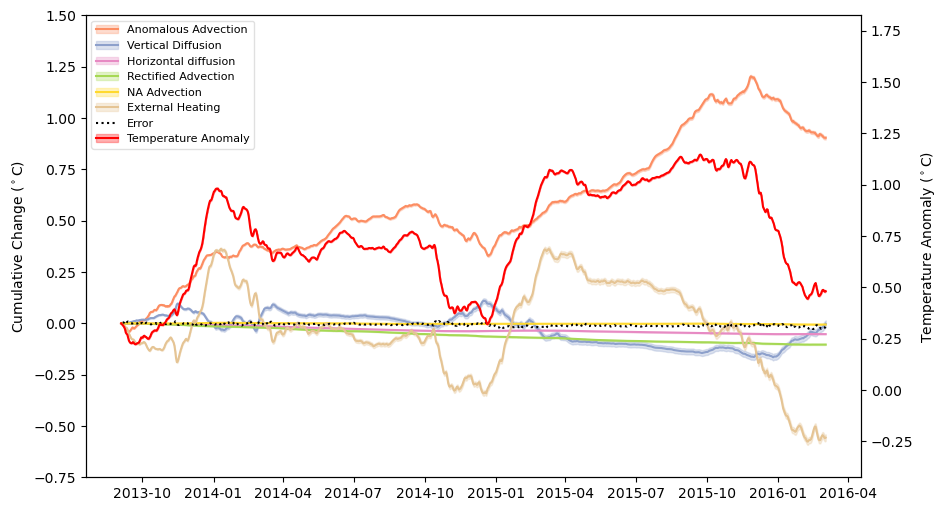

In [33]:
case = 'nep_north_mhw'
plt.figure(figsize = (10,6))
ax = plt.axes()
plt_case_line(case,ax)

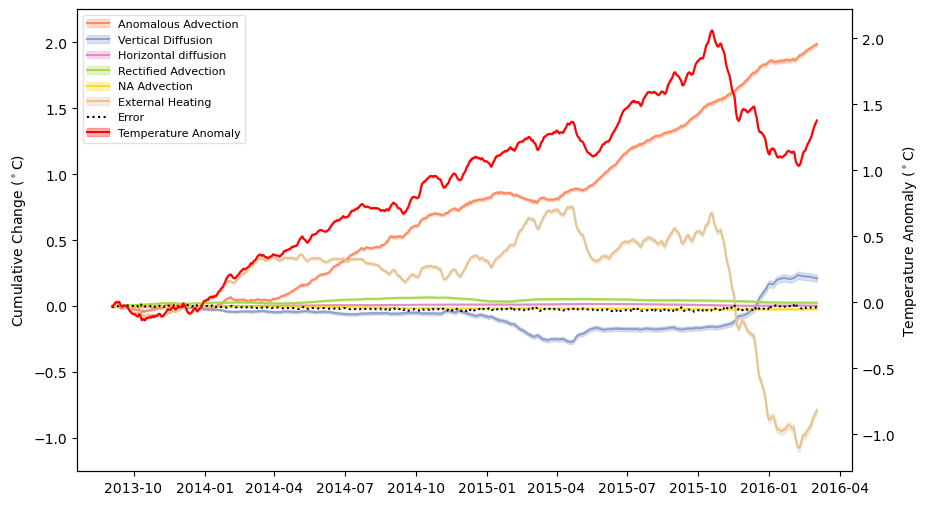

In [35]:
case = 'nep_south_mhw'
plt.figure(figsize = (10,6))
ax = plt.axes()
plt_case_line(case,ax,ylim = (-1.25,2.25))

In [19]:
nep_path = '/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/NEP/'
map = xr.open_zarr(nep_path+'map_north_mhw.zarr')
map['I'] = map['F']+map['I']
time_slc = [slice(0,5),slice(5,15),slice(15,19),slice(19,30)]
all_time = [f'{year}-{month:02}' for year in range(2013,2017) for month in range(1,13)][8:]
time_labels = [all_time[slc.start]+' to '+all_time[slc.stop] for slc in time_slc]

In [20]:
ien = 0
def heat_map(map,var,tslc,ind,ax = None,
             add_goa = False, add_cc=False,add_q = False,
             time_label = False, term_label=False, 
             vmax = 50,
             xlabel = True,ylabel = True,
             north = True,
             colorbar = False,
             tlabel_pos = -0.29
            ):
    sp = ((-1)**(ien+1)*map[var][tslc]).sum(dim = 'Z').sum(dim = 'month')
    to_plot = sp*VOLUME_EACH*rhoconst*c_p/ecco_grid.rA/1e8
    for ii in [7,8,10,11]:
        p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,to_plot[ii] ,vmax = vmax,vmin = -vmax,cmap = balance, transform = ccrs.PlateCarree(),linewidth=0,rasterized=True)
        p2.set_edgecolor('face')
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
    if north:
        ax.set_extent([-200,-110,15,65],crs = ccrs.PlateCarree())
    else:
        ax.set_extent([-170,-75,-5,45],crs = ccrs.PlateCarree())
    if time_label:
        ax.text(0.5, tlabel_pos, time_label, va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.set_title('('+chr(97+ind)+')',loc = 'left',x = subnum_offset)
    if term_label:
        ax.text(1.15, 0.55,case_term_dic[var], va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes)
    if add_goa:
        ax.plot([-158,-158],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
        ax.plot([-138,-138],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
        ax.plot([-158,-138],[32,32],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
        ax.plot([-158,-138],[45,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
    if add_q:
        ax.plot([-160,-160],[35,60],zorder = 10,transform = ccrs.PlateCarree(),color = 'magenta')
        ax.plot([-125,-125],[35,60],zorder = 10,transform = ccrs.PlateCarree(),color = 'magenta')
        ax.plot([-160,-125],[35,35],zorder = 10,transform = ccrs.PlateCarree(),color = 'magenta')
        ax.plot([-160,-125],[60,60],zorder = 10,transform = ccrs.PlateCarree(),color = 'magenta')
    if add_cc:
        ax.plot([lon1,lon2],[lat1,lat2],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
        ax.plot([lon2,lon3],[lat2,lat3],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
        ax.plot([lon3,lon4],[lat3,lat4],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
        ax.plot([lon4,lon1],[lat4,lat1],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
    gl = ax.gridlines(draw_labels = True,linestyle="--", linewidth=0.5)
    gl.top_labels = False
    gl.right_labels= False
    gl.xlabel_style = {'size':8}
    gl.ylabel_style = {'size':8}
    if not xlabel:
        gl.bottom_labels = False
    if not ylabel:
        gl.left_labels= False
    if colorbar:
        plt.colorbar(p2)

In [21]:
time64 = [np.datetime64(i) for i in all_time]

marker_pairs = [(time64[slc.start],time64[slc.stop]) for slc in time_slc]

In [22]:
space = 0.25
wspace = 0.05
subnum_offset = -0.0
small = 0.08
vmax = 5

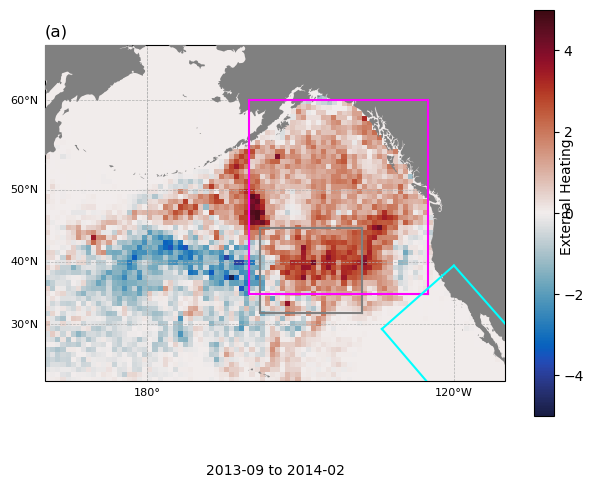

In [23]:
ax = plt.axes(projection = projection)
heat_map(map,'I',time_slc[0],0,ax = ax,vmax = 5,add_goa = True,add_cc = True,add_q = True,term_label = True,time_label = time_labels[0],colorbar = True)
plt.tight_layout()

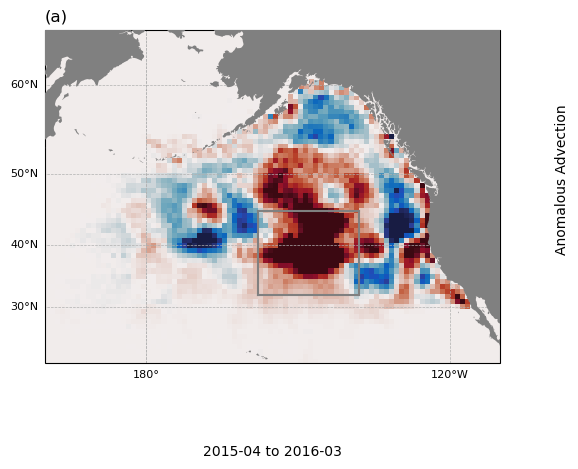

In [26]:
ax = plt.axes(projection = projection)
heat_map(map,'A',time_slc[3],0,ax = ax,vmax = 5,add_goa = True,term_label = True,time_label = time_labels[3])
plt.tight_layout()

/tmp/ipykernel_1569409/392067454.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


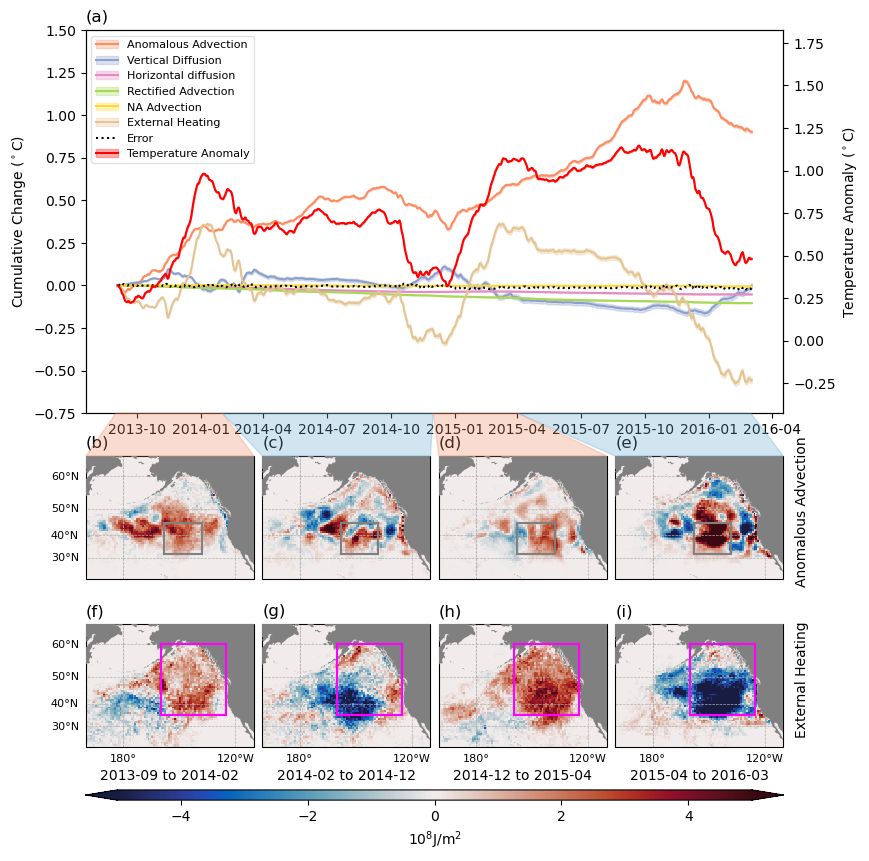

In [24]:
fig = plt.figure(figsize=(9, 10))
varlist = ['A','I']
gs = GridSpec(2+len(varlist), 4, figure=fig,height_ratios = [3]+[1 for i in varlist]+[small],wspace = wspace,hspace = space)
ax0 = fig.add_subplot(gs[0, :])
ax0.set_title('(a)',loc = 'left',x = -0.0)
case = 'nep_north_mhw'
plt_case_line(case,ax0)

axs = []
ind = 1
for iterm,var in enumerate(varlist):
    for it in range(4):
        ylabel = it==0
        xlabel = iterm==(len(varlist)-1)
        term_label = it==3
        if xlabel:
            time_label = time_labels[it]
        else:
            time_label = False
        add_goa = var == 'A'
        add_q = var == 'I'
        ax = fig.add_subplot(gs[iterm+1,it],projection = projection)
        heat_map(map,var,time_slc[it],ind,
                 ax = ax,
                 vmax = vmax,
                 ylabel = ylabel,
                 xlabel = xlabel,
                 term_label = term_label,
                 time_label = time_label,
                 add_goa = add_goa,
                 add_q = add_q,
                )
        ind+=1
        axs.append(ax)
cax = fig.add_subplot(gs[-1, :])

base_y = ax0.get_ylim()[0]

for ip in range(4):
    if ip%2==0:
        color = '#ef8a62'
    else:
        color = '#67a9cf'
    x1,x2 = marker_pairs[ip]
    x1 = dates.date2num(x1)
    x2 = dates.date2num(x2)
    xy1_display = ax0.transData.transform((x1, base_y))
    xy2_display = ax0.transData.transform((x2, base_y))
    
    xy1_fig = fig.transFigure.inverted().transform(xy1_display)
    xy2_fig = fig.transFigure.inverted().transform(xy2_display)
    
    ax_box = axs[ip].get_position()
    
    # Define polygon points in figure coordinates
    polygon_points = [
        (xy1_fig[0], xy1_fig[1]),  # Top-right of ax1 at y1_poly
        (xy2_fig[0], xy2_fig[1]),  # Top-left of ax2 at y2_poly
        (ax_box.x1, ax_box.y1),  # Bottom-left of ax2
        (ax_box.x0, ax_box.y1)   # Bottom-right of ax1
    ]
    polygon = patches.Polygon(polygon_points, closed=True, color=color, alpha=0.3, transform=fig.transFigure)
    fig.patches.append(polygon)

norm = plt.Normalize(-vmax,vmax)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmocean.cm.balance), cax = cax,shrink = 1,orientation = 'horizontal',extend = 'both')
cbar.set_label(r'$10^8 \mathrm{J/m^2}$')
plt.tight_layout()
plt.savefig('nc_fig2.pdf', format="pdf",dpi = 300)

In [25]:
gs = GridSpec(2+len(varlist), 4, figure=fig,height_ratios = [3]+[1 for i in varlist]+[small],wspace = wspace,hspace = space)
for iterm,var in enumerate(varlist):
    for it in range(4):
        ylabel = it==0
        xlabel = iterm==(len(varlist)-1)
        term_label = it==3
        if xlabel:
            time_label = time_labels[it]
        else:
            time_label = False
        add_goa = var == 'A'
        add_q = var == 'I'
        ax = fig.add_subplot(gs[iterm+1,it],projection = projection)
        heat_map(map,var,time_slc[it],ind,
                 ax = ax,
                 vmax = vmax,
                 ylabel = ylabel,
                 xlabel = xlabel,
                 term_label = term_label,
                 time_label = time_label,
                 add_goa = add_goa,
                 add_q = add_q,
                )

In [26]:
map = xr.open_zarr(nep_path+'map_south_mhw.zarr')
map['I'] = map['F']+map['I']
time_slc = [slice(0,26),slice(26,30)]
all_time = [f'{year}-{month:02}' for year in range(2013,2017) for month in range(1,13)][8:]
time_labels = [all_time[slc.start]+' to '+all_time[slc.stop] for slc in time_slc]
time_labels

['2013-09 to 2015-11', '2015-11 to 2016-03']

In [27]:
sprojection = ccrs.Mercator(central_longitude=180.0, 
                           latitude_true_scale=40.0)

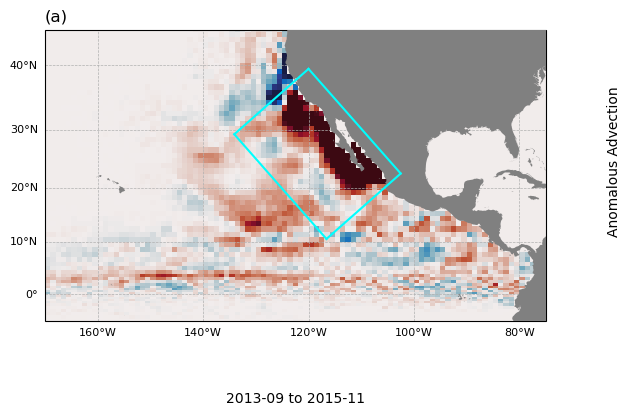

In [28]:
ax = plt.axes(projection = sprojection)
heat_map(map,'A',time_slc[0],0,ax = ax,vmax = 5,add_cc = True,term_label = True,time_label = time_labels[0],north = False)
plt.tight_layout()

In [29]:
time64 = [np.datetime64(i) for i in all_time]

marker_pairs = [(time64[slc.start],time64[slc.stop]) for slc in time_slc]

In [30]:
space = 0.3
wspace = 0.15
subnum_offset = -0.1
small = 0.08
vmax = 5

/tmp/ipykernel_1569409/193749842.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


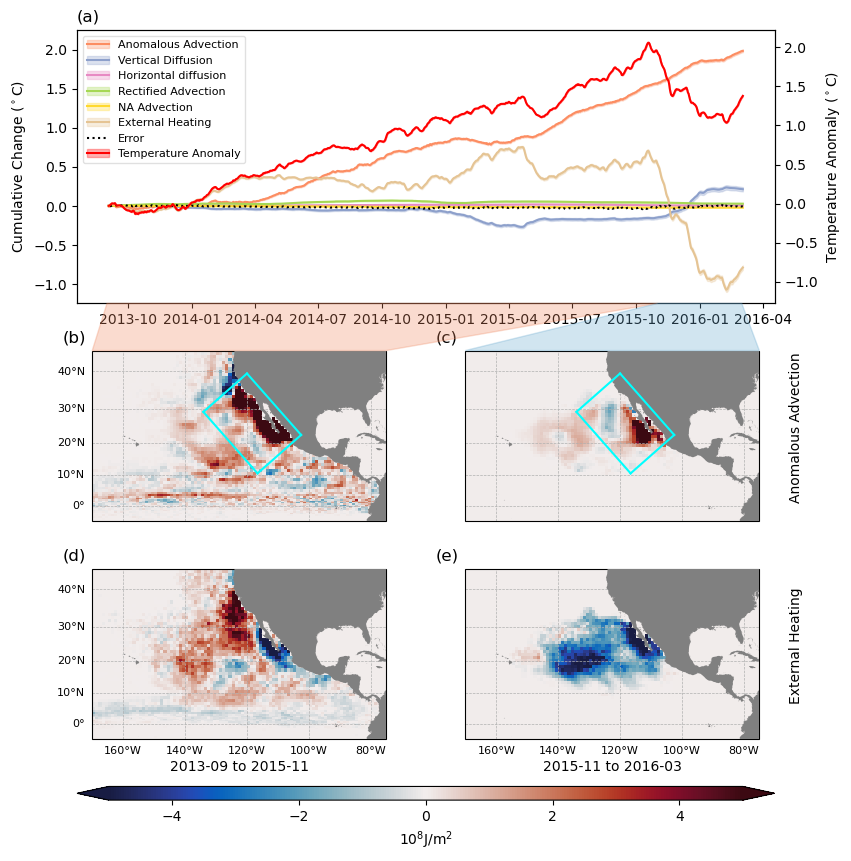

In [31]:
fig = plt.figure(figsize=(9, 10))
varlist = ['A','I']
gs = GridSpec(2+len(varlist), len(time_slc), figure=fig,height_ratios = [1.6]+[1 for i in varlist]+[small],wspace = wspace,hspace = space)
ax0 = fig.add_subplot(gs[0, :])
ax0.set_title('(a)',loc = 'left',x = -0.0)
case = 'nep_south_mhw'
plt_case_line(case,ax0,ylim = (-1.25,2.25))

axs = []
ind = 1
for iterm,var in enumerate(varlist):
    for it in range(len(time_slc)):
        ylabel = it==0
        xlabel = iterm==(len(varlist)-1)
        term_label = it==len(time_slc)-1
        if xlabel:
            time_label = time_labels[it]
        else:
            time_label = False
        add_cc = var == 'A'
        ax = fig.add_subplot(gs[iterm+1,it],projection = sprojection)
        heat_map(map,var,time_slc[it],ind,
                 ax = ax,
                 vmax = vmax,
                 ylabel = ylabel,
                 xlabel = xlabel,
                 term_label = term_label,
                 time_label = time_label,
                 add_cc = add_cc,
                 north = False,
                 tlabel_pos = -0.2
                )
        ind+=1
        axs.append(ax)
cax = fig.add_subplot(gs[-1, :])

base_y = ax0.get_ylim()[0]

for ip in range(len(time_slc)):
    if ip%2==0:
        color = '#ef8a62'
    else:
        color = '#67a9cf'
    x1,x2 = marker_pairs[ip]
    x1 = dates.date2num(x1)
    x2 = dates.date2num(x2)
    xy1_display = ax0.transData.transform((x1, base_y))
    xy2_display = ax0.transData.transform((x2, base_y))
    
    xy1_fig = fig.transFigure.inverted().transform(xy1_display)
    xy2_fig = fig.transFigure.inverted().transform(xy2_display)
    
    ax_box = axs[ip].get_position()
    
    # Define polygon points in figure coordinates
    polygon_points = [
        (xy1_fig[0], xy1_fig[1]),  # Top-right of ax1 at y1_poly
        (xy2_fig[0], xy2_fig[1]),  # Top-left of ax2 at y2_poly
        (ax_box.x1, ax_box.y1),  # Bottom-left of ax2
        (ax_box.x0, ax_box.y1)   # Bottom-right of ax1
    ]
    polygon = patches.Polygon(polygon_points, closed=True, color=color, alpha=0.3, transform=fig.transFigure)
    fig.patches.append(polygon)

norm = plt.Normalize(-vmax,vmax)
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmocean.cm.balance), cax = cax,shrink = 1,orientation = 'horizontal',extend = 'both')
cbar.set_label(r'$10^8 \mathrm{J/m^2}$')
plt.tight_layout()
plt.savefig('nc_fig3.pdf', format="pdf",dpi = 300)

In [32]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.patches as patches

# # Create figure and subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# # Sample data
# x = np.linspace(0, 10, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)

# # Plot data on each subplot
# ax1.plot(x, y1, color='b', label='sin(x)')
# ax2.plot(x, y2, color='r', label='cos(x)')

# ax1.set_title('Sine Wave')
# ax2.set_title('Cosine Wave')

# ax1.legend()
# ax2.legend()

# # Define coordinates in data space
# x1, y1_poly = 10, np.sin(10)  # End of sine wave
# x2, y2_poly = 0, np.cos(0)    # Start of cosine wave

# # Convert data coordinates to display (figure) coordinates
# xy1_display = ax1.transData.transform((x1, y1_poly))
# xy2_display = ax2.transData.transform((x2, y2_poly))

# # Convert display coordinates to figure coordinates
# xy1_fig = fig.transFigure.inverted().transform(xy1_display)
# xy2_fig = fig.transFigure.inverted().transform(xy2_display)

# # Get subplot bounding boxes in figure coordinates
# ax1_box = ax1.get_position()
# ax2_box = ax2.get_position()

# # Define polygon points in figure coordinates
# polygon_points = [
#     (ax1_box.x1, -xy1_fig[1]),  # Top-right of ax1 at y1_poly
#     (ax2_box.x0, xy2_fig[1]),  # Top-left of ax2 at y2_poly
#     (ax2_box.x0, ax2_box.y0),  # Bottom-left of ax2
#     (ax1_box.x1, ax1_box.y0)   # Bottom-right of ax1
# ]

# # Create and add the polygon patch to the figure
# polygon = patches.Polygon(polygon_points, closed=True, color='gray', alpha=0.3, transform=fig.transFigure)
# fig.patches.append(polygon)

# plt.show()
